In [1]:
import torch
import torchvision
from torchvision import datasets, transforms

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = datasets.MNIST('',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
x, y = data[0][0], data[1][0]

print(y)

tensor(7)


torch.Size([1, 28, 28])


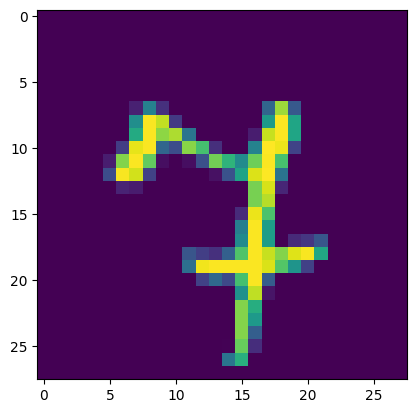

In [6]:
import matplotlib.pyplot as plt
print(data[0][0].shape)
plt.imshow(data[0][0].view(28,28))
plt.show()

In [8]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] = counter_dict[int(y)] + 1
        total = total + 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x,dim=1)


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [11]:
X = torch.rand((28,28))
X = X.view(-1,28*28)
output = net(X)
output

tensor([[-2.3864, -2.1967, -2.1938, -2.3078, -2.4228, -2.1942, -2.2673, -2.4218,
         -2.2595, -2.4188]], grad_fn=<LogSoftmaxBackward0>)

In [12]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

In [13]:
for epoch in range(EPOCHS):
    for data in trainset:
        X,y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0094, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.5105, grad_fn=<NllLossBackward0>)


In [14]:
correct = 0 
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1

print('Accuracy: ', round(correct/total,3))

Accuracy:  0.979


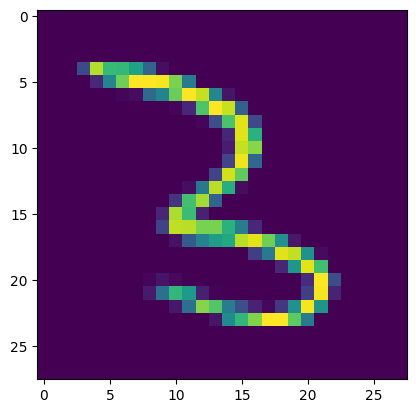

In [23]:
plt.imshow(X[4].view(28,28))
plt.show()

In [24]:
print('The number is: ' , torch.argmax(net(X[4].view(-1,28*28))))

The number is:  tensor(3)
